In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
spray = pd.read_csv("./data/spray.csv")
data = pd.read_csv("./data/train.csv")

In [5]:
# checking that I know how I want to present the data

print(data["NumMosquitos"].sum()/data["NumMosquitos"].count())
print((data[data["WnvPresent"]==1]).count()["WnvPresent"]/(data["WnvPresent"]).count())

12.853512278697886
0.05244622120692937


In [6]:
spray_decay = {
    '2013-07-17': ['2013-07-12', '2013-07-19', '2013-07-25', '2013-08-01', '2013-08-08', '2013-08-15'],
    '2013-07-25': ['2013-07-19', '2013-07-25', '2013-08-01', '2013-08-08', '2013-08-15', '2013-08-22'],
    '2013-08-08': ['2013-08-01', '2013-08-08', '2013-08-15', '2013-08-22', '2013-08-29', '2013-09-06'],
    '2013-08-15': ['2013-08-08', '2013-08-15', '2013-08-22', '2013-08-29', '2013-09-06', '2013-09-12'],
    '2013-08-16': ['2013-08-15', '2013-08-22', '2013-08-29', '2013-09-06', '2013-09-12'],
    '2013-08-22': ['2013-08-15', '2013-08-22', '2013-08-29', '2013-09-06', '2013-09-12', '2013-09-19'],
    '2013-08-29': ['2013-08-22', '2013-08-29', '2013-09-06', '2013-09-12', '2013-09-19', '2013-09-26'],
    '2013-09-05': ['2013-08-29', '2013-09-06', '2013-09-12', '2013-09-19', '2013-09-26']
}

/Users/brianconnor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


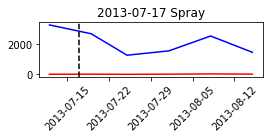

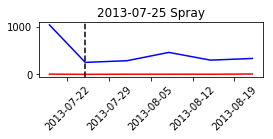

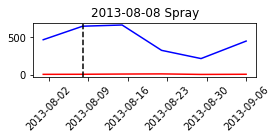

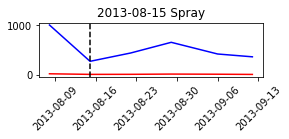

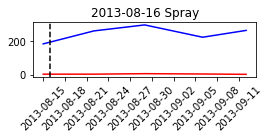

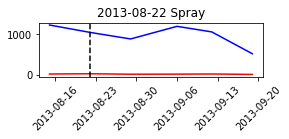

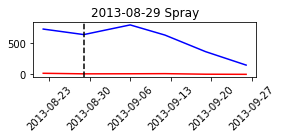

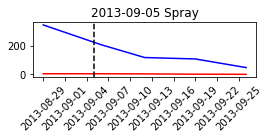

In [7]:
# this is mac's crazy double loop that he used to show mosquito counts and precipitation. I just repurposed it to
# show mosquito average and %WNV (the cell below this one)

# this cell is looking at total mosquitos vs % of traps with west nile, which doesn't work on the same axis

for k, v in spray_decay.items():
    spray_describe = spray[spray['Date'] == k].describe()
    mask1_1 = data['Longitude'] >= spray_describe.loc['min', 'Longitude'] 
    mask1_2 = data['Longitude'] <= spray_describe.loc['max', 'Longitude']
    mask2_1 = data['Latitude'] >= spray_describe.loc['min', 'Longitude']
    mask2_2 = data['Longitude'] <= spray_describe.loc['max', 'Longitude']
    present_mask = data.WnvPresent==1
    small_mask = mask1_1 & mask1_2 & mask2_1 & mask2_2
    big_mask = mask1_1 & mask1_2 & mask2_1 & mask2_2 & present_mask
    
    to_graph = pd.DataFrame(columns = ['Date', 'Wnv_Present'])
    
    for i in range(len(v)):
        spraytest = data[data['Date'] == v[i]]
        to_graph = to_graph.append({'Date': v[i], 'Wnv_Present': spraytest[big_mask]["WnvPresent"].count(), "Num_Mosquitos": spraytest[small_mask]["NumMosquitos"].sum()}, ignore_index=True)
        
    to_graph['Date'] = pd.to_datetime(to_graph['Date'])
    
    fig = plt.figure(figsize = (4,1))
    plt.plot(to_graph['Date'], to_graph['Wnv_Present'], color="r")
    plt.plot(to_graph["Date"], to_graph["Num_Mosquitos"], color="b")
    plt.title('{} Spray'. format(k))
    plt.xticks(rotation = 45)
    plt.axvline(x=k, color='k', linestyle='--')

/Users/brianconnor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/brianconnor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


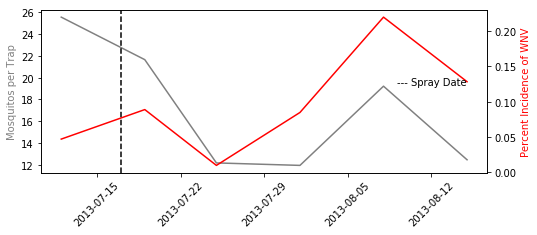

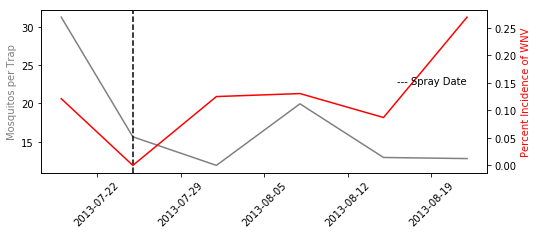

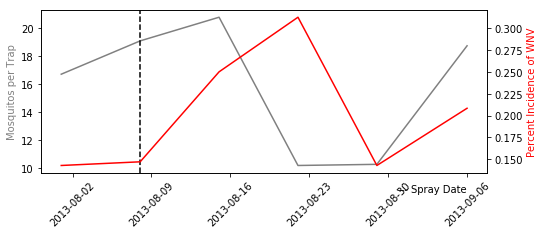

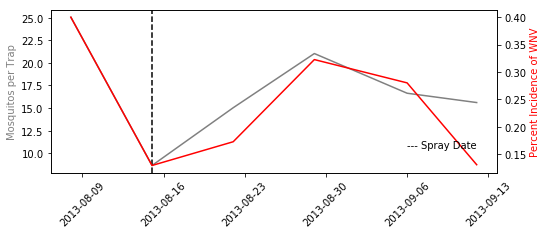

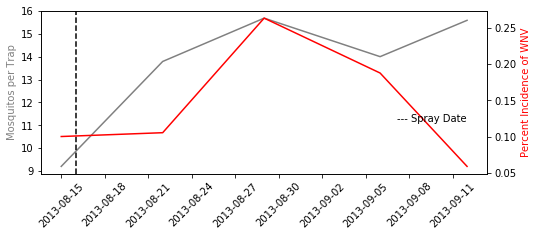

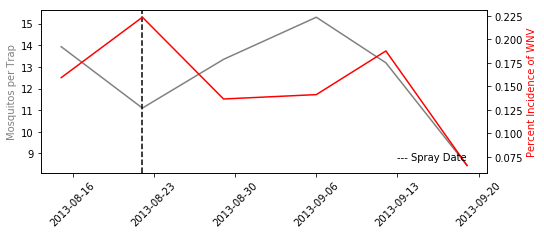

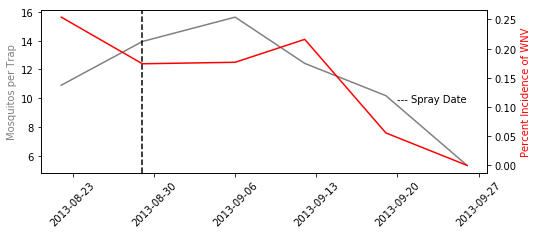

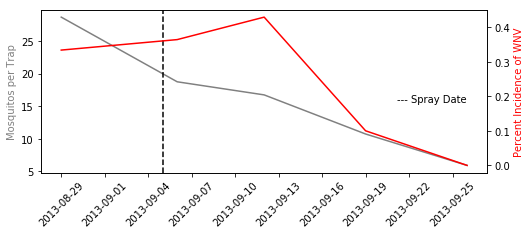

In [8]:
# this cell uses 2 axes which is much better

for k, v in spray_decay.items():
    spray_describe = spray[spray['Date'] == k].describe()
    mask1_1 = data['Longitude'] >= spray_describe.loc['min', 'Longitude'] 
    mask1_2 = data['Longitude'] <= spray_describe.loc['max', 'Longitude']
    mask2_1 = data['Latitude'] >= spray_describe.loc['min', 'Longitude']
    mask2_2 = data['Longitude'] <= spray_describe.loc['max', 'Longitude']
    present_mask = data.WnvPresent==1
    small_mask = mask1_1 & mask1_2 & mask2_1 & mask2_2
    big_mask = mask1_1 & mask1_2 & mask2_1 & mask2_2 & present_mask
    
    to_graph = pd.DataFrame(columns = ['Date', 'Mosq_per_Trap', 'Percent_WNV'])
    
    for i in range(len(v)):
        spraytest = data[data['Date'] == v[i]]
        to_graph = to_graph.append({'Date': v[i], 
                                    'Mosq_per_Trap': (spraytest[small_mask]['NumMosquitos'].sum())/spraytest[small_mask]["NumMosquitos"].count(),
                                    'Percent_WNV': (spraytest[big_mask]['WnvPresent'].count()/spraytest[small_mask]["WnvPresent"].count())}, 
                                   ignore_index=True)
        
    to_graph['Date'] = pd.to_datetime(to_graph['Date'])
    
    to_graph
    fig, ax1 = plt.subplots(figsize = (8,3))
    
    plt.xticks(rotation = 45)
    
    ax1.plot(to_graph['Date'], to_graph['Mosq_per_Trap'], color = 'grey')
    ax1.axvline(x=k, color='k', linestyle='--')
    ax1.set_ylabel('Mosquitos per Trap', color = 'grey')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Percent Incidence of WNV', color = 'r')
    ax2.plot(to_graph['Date'], to_graph['Percent_WNV'], color = 'r')
    ax2.text(to_graph['Date'].iloc[-1], to_graph['Percent_WNV'].max()-to_graph['Percent_WNV'].mean(), '--- Spray Date', horizontalalignment='right')